In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2
sns.set()

In [9]:
#importing data
df_ttnc = pd.read_csv("titanic.csv")
df_ttnc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_ttnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [148]:
df_class = pd.crosstab(index = df_ttnc['Survived'], columns=df_ttnc['Pclass'])
df_classp = df_class/df_class.sum()
df_classp

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


Text(0.5, 0, 'Survived')

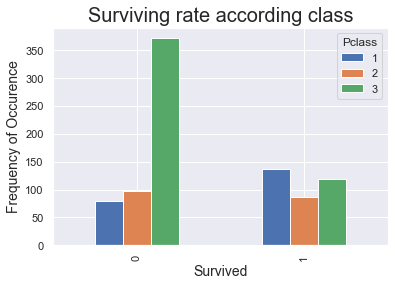

In [95]:
df_class.plot(kind = 'bar')
plt.title('Surviving rate according class', size=20)
plt.ylabel('Frequency of Occurence', size=14)
plt.xlabel('Survived',size=14)

In [145]:
stat, p, dof, expected = chi2_contingency(df_class)
print('degrees of freedom = %d' % dof)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability= %.3f, critical= %.3f, stat= %.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Variables are dependent (reject H0)')
else:
    print('Variables are independent (fail to reject H0)')

degrees of freedom = 2
probability=0.950, critical=5.991, stat=102.889
Variables are dependent (reject H0)


In [117]:
chisquare(df_class, axis=None ,ddof=2)

Power_divergenceResult(statistic=418.2188552188552, pvalue=2.5038371592596995e-90)

In [59]:
df_gender = pd.crosstab(index = df_ttnc['Survived'], columns=df_ttnc['Sex'])
df_genderp = df_gender/df_gender.sum()
df_genderp

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


Text(0.5, 0, 'Survived')

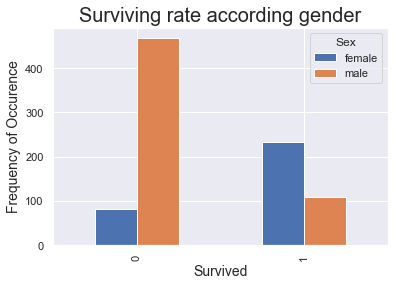

In [96]:
df_gender.plot(kind = 'bar')
plt.title('Surviving rate according gender', size=20)
plt.ylabel('Frequency of Occurence', size=14)
plt.xlabel('Survived',size=14)

In [144]:
stat, p, dof, expected = chi2_contingency(df_gender)
print('degrees of freedom = %d' % dof)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Variables are dependent (reject H0)')
else:
    print('Variables are independent (fail to reject H0)')

degrees of freedom = 1
probability=0.950, critical=3.841, stat=260.717
Variables are dependent (reject H0)


In [61]:
df_age = pd.crosstab(index = df_ttnc['Survived'], columns=df_ttnc['Age'])
df_agep = df_age/df_age.sum()
df_agep

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.285714,0.7,0.166667,0.3,0.0,...,0.5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1.0,1.0,1.0,1.0,1.0,0.714286,0.3,0.833333,0.7,1.0,...,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [82]:
df_age = df_ttnc

In [102]:
bins = [-np.inf, 18, np.inf]
df_age['Bins'] = pd.cut(df_age['Age'], bins)
df_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, inf]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(18.0, inf]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(18.0, inf]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(18.0, inf]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(18.0, inf]"


In [146]:
df_agebinned = pd.crosstab(index = df_age['Survived'], columns=df_age['Bins'])
df_agebinned.columns = ['Children','Adults']
df_agebinnedp = df_agebinned/df_agebinned.sum()
df_agebinnedp

,Children,Adults
Survived,,
0,0.496403,0.617391
1,0.503597,0.382609


Text(0.5, 0, 'Survived')

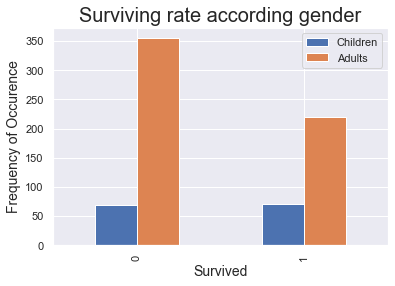

In [147]:
df_agebinned.plot(kind = 'bar')
plt.title('Surviving rate according gender', size=20)
plt.ylabel('Frequency of Occurence', size=14)
plt.xlabel('Survived',size=14)

In [143]:
stat, p, dof, expected = chi2_contingency(df_agebinned)
print('degrees of freedom = %d' % dof)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Variables are dependent (reject H0)')
else:
    print('Variables are independent (fail to reject H0)')

degrees of freedom = 1
probability=0.950, critical=3.841, stat=6.301
Variables are dependent (reject H0)
